In [267]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/twitchdata/twitchdata-update.csv


In [268]:
import numpy  as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn           as sns
import base64
from IPython.display import display, HTML
from wordcloud import WordCloud

In [269]:
data = pd.read_csv('/kaggle/input/twitchdata/twitchdata-update.csv')
data.head(5)

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
0,xQcOW,6196161750,215250,222720,27716,3246298,1734810,93036735,True,False,English
1,summit1g,6091677300,211845,310998,25610,5310163,1370184,89705964,True,False,English
2,Gaules,5644590915,515280,387315,10976,1767635,1023779,102611607,True,True,Portuguese
3,ESL_CSGO,3970318140,517740,300575,7714,3944850,703986,106546942,True,False,English
4,Tfue,3671000070,123660,285644,29602,8938903,2068424,78998587,True,False,English


In [270]:
data.describe()

,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained
count,1.000000e+03,1000.000000,1000.000000,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03
mean,4.184279e+08,120515.160000,37065.051000,4781.040000,5.700541e+05,2.055185e+05,1.166817e+07
std,5.496355e+08,85376.201364,60314.307686,8453.684965,8.044134e+05,3.399137e+05,2.490572e+07
min,1.221928e+08,3465.000000,496.000000,235.000000,3.660000e+03,-1.577200e+04,1.757880e+05
25%,1.631899e+08,73758.750000,9113.750000,1457.750000,1.705462e+05,4.375825e+04,3.880602e+06
50%,2.349908e+08,108240.000000,16676.000000,2425.000000,3.180630e+05,9.835200e+04,6.456324e+06
75%,4.337399e+08,141843.750000,37569.750000,4786.250000,6.243322e+05,2.361308e+05,1.219676e+07
max,6.196162e+09,521445.000000,639375.000000,147643.000000,8.938903e+06,3.966525e+06,6.701375e+08


In [271]:
drop_channels = ['Call of Duty (callofduty)',
                 'CapcomFighters',
                 'dota2mc_ru',
                 'dota2ti',
                 'dota2ti_ru',
                 'DreamHackCS',
                 'DreamHackDota2_RU',
                 'DreamLeague',
                 'EAMaddenNFL',
                 'EASPORTSFIFA',
                 'ESAMarathon',
                 'ESL_CSGO',
                 'ESL_CSGO_FR',
                 'ESL_CSGOb',
                 'ESL_DOTA2',
                 'ESL_SC2',
                 'Fextralife', #this isn't an esports channel but people who exploited a loophole for viewership, so we'll remove them
                 'LCK',
                 'LCK_Korea',
                 'LCS',
                 'NBA2KLeague',
                 'OverwatchLeague',
                 'PG_Esports',
                 'PUBG',
                 'PlayHearthstone',
                 'Riot Games (riotgames)',
                 'RiotGamesBrazil',
                 'RiotGamesJP',
                 'RiotGamesOCE',
                 'RiotGamesRU',
                 'RiotGamesTurkish',
                 'RocketLeague',
                 'StarCraft',
                 'StarLadder5',
                 'StarLadder_cs_en',
                 'Twitch',
                 'TwitchRivals',
                 'UCCleague',
                 'Warcraft',
                 'WePlayEsport_EN',
                 'WePlayEsport_RU',
                 'btscsgo',
                 'btssmash',
                 'primeleague'
                 ]

In [272]:
# Remove rows where the channel name is in the drop_channels list
data = data[~data['Channel'].isin(drop_channels)]

In [273]:
data.head(5)

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
0,xQcOW,6196161750,215250,222720,27716,3246298,1734810,93036735,True,False,English
1,summit1g,6091677300,211845,310998,25610,5310163,1370184,89705964,True,False,English
2,Gaules,5644590915,515280,387315,10976,1767635,1023779,102611607,True,True,Portuguese
4,Tfue,3671000070,123660,285644,29602,8938903,2068424,78998587,True,False,English
5,Asmongold,3668799075,82260,263720,42414,1563438,554201,61715781,True,False,English


In [274]:
data.describe()

,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained
count,9.560000e+02,956.000000,956.000000,956.000000,9.560000e+02,9.560000e+02,9.560000e+02
mean,4.031658e+08,122076.621339,32313.709205,4120.604603,5.612149e+05,2.069261e+05,1.041869e+07
std,5.275054e+08,83600.280627,49915.673811,5283.216814,7.999198e+05,3.455421e+05,1.274264e+07
min,1.221928e+08,3465.000000,496.000000,235.000000,3.660000e+03,-1.577200e+04,1.757880e+05
25%,1.630715e+08,77497.500000,8702.750000,1417.500000,1.682432e+05,4.375825e+04,3.783555e+06
50%,2.325201e+08,109807.500000,16010.500000,2324.000000,3.126825e+05,9.878300e+04,6.211679e+06
75%,4.186067e+08,142796.250000,33063.000000,4441.250000,6.122012e+05,2.338185e+05,1.146040e+07
max,6.196162e+09,521445.000000,538444.000000,53986.000000,8.938903e+06,3.966525e+06,1.153130e+08


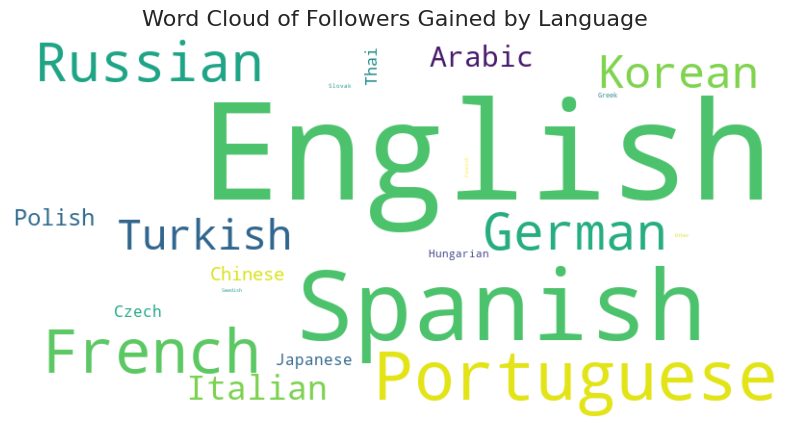

In [275]:
if 'Language' in data.columns and 'Followers gained' in data.columns:
    # Create a frequency dictionary for the WordCloud
    freq_dict = data.groupby('Language')['Followers gained'].sum().to_dict()

    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate_from_frequencies(freq_dict)

    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud of Followers Gained by Language', fontsize=16)
    plt.savefig('word_cloud_followers_gained.png')
    plt.show()
    
else:
    print("Columns 'Language' and 'Followers gained' not found in the dataset.")

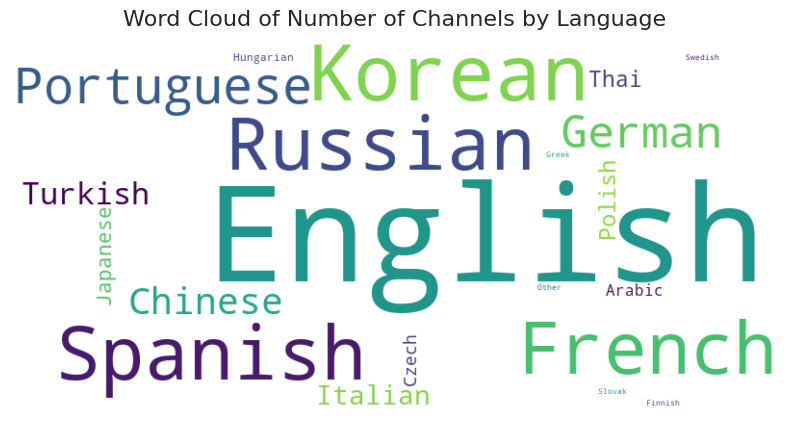

In [276]:
    language_counts = data['Language'].value_counts().to_dict()

    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate_from_frequencies(language_counts)

    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud of Number of Channels by Language', fontsize=16)
    plt.savefig('word_cloud_followers_channels.png')
    plt.show()

/opt/conda/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


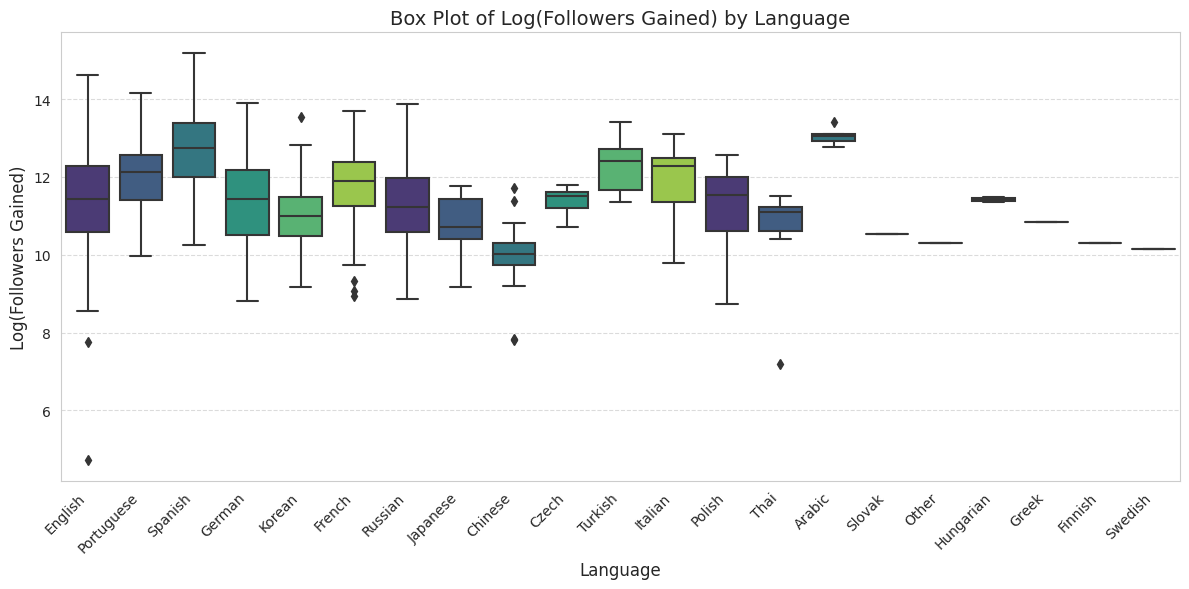

In [277]:
sns.set_style("whitegrid")  # Options: 'darkgrid', 'whitegrid', 'dark', 'white', 'ticks'

# Adjust the palette for better contrast
palette = sns.color_palette("viridis", as_cmap=False)

# Log-transform the data (if not already done)
data['Log Followers Gained'] = np.log1p(data['Followers gained'])  # log1p handles log(0)

# Set up the plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='Language', y='Log Followers Gained', palette=palette, showfliers=True, fliersize=5)

# Customize the plot
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.xlabel('Language', fontsize=12)
plt.ylabel('Log(Followers Gained)', fontsize=12)
plt.title('Box Plot of Log(Followers Gained) by Language', fontsize=14)

# Add gridlines for visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Improve layout
plt.tight_layout()

plt.savefig('box_plot_followers_gained.png')
# Show the plot
plt.show()

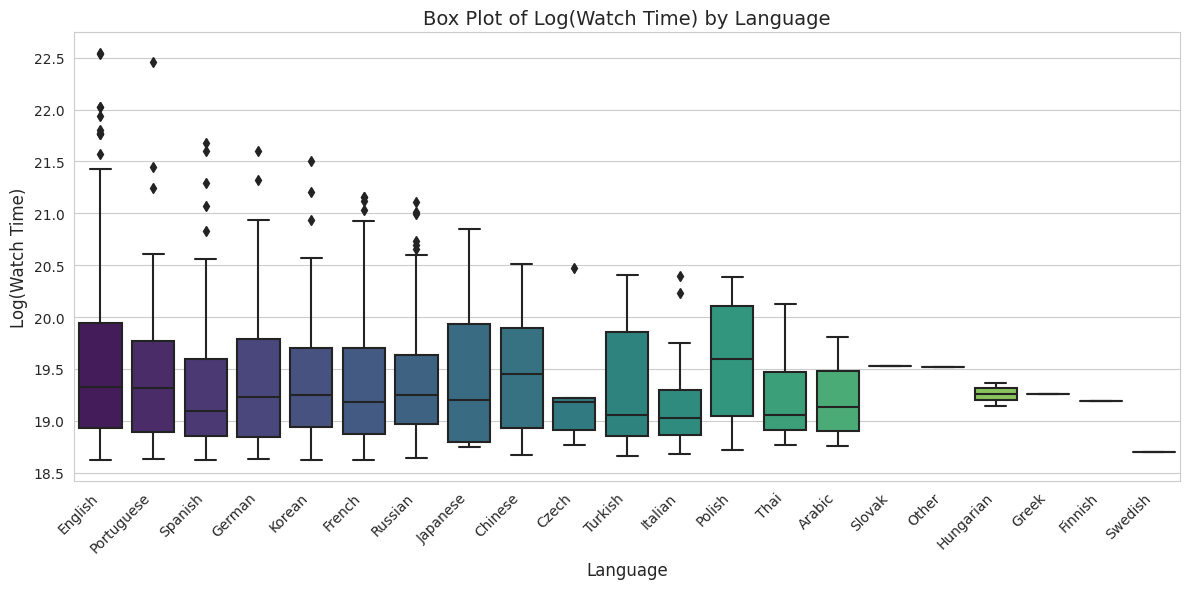

In [278]:
if 'Language' in data.columns and 'Watch time(Minutes)' in data.columns:
    # Add a new column for the log of 'Watch time(Minutes)' (handle non-positive values)
    data['Log Watch Time'] = np.log1p(data['Watch time(Minutes)'])  # log1p handles log(0)

    # Set up the plot
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=data, x='Language', y='Log Watch Time', palette='viridis')

    # Customize the plot
    plt.xticks(rotation=45, ha='right')
    plt.xlabel('Language', fontsize=12)
    plt.ylabel('Log(Watch Time)', fontsize=12)
    plt.title('Box Plot of Log(Watch Time) by Language', fontsize=14)
    plt.tight_layout()
    plt.savefig('box_plot_watch_time.png')
    # Show the plot
    plt.show()
else:
    print("Columns 'Language' and 'Watch time(Minutes)' not found in the dataset.")

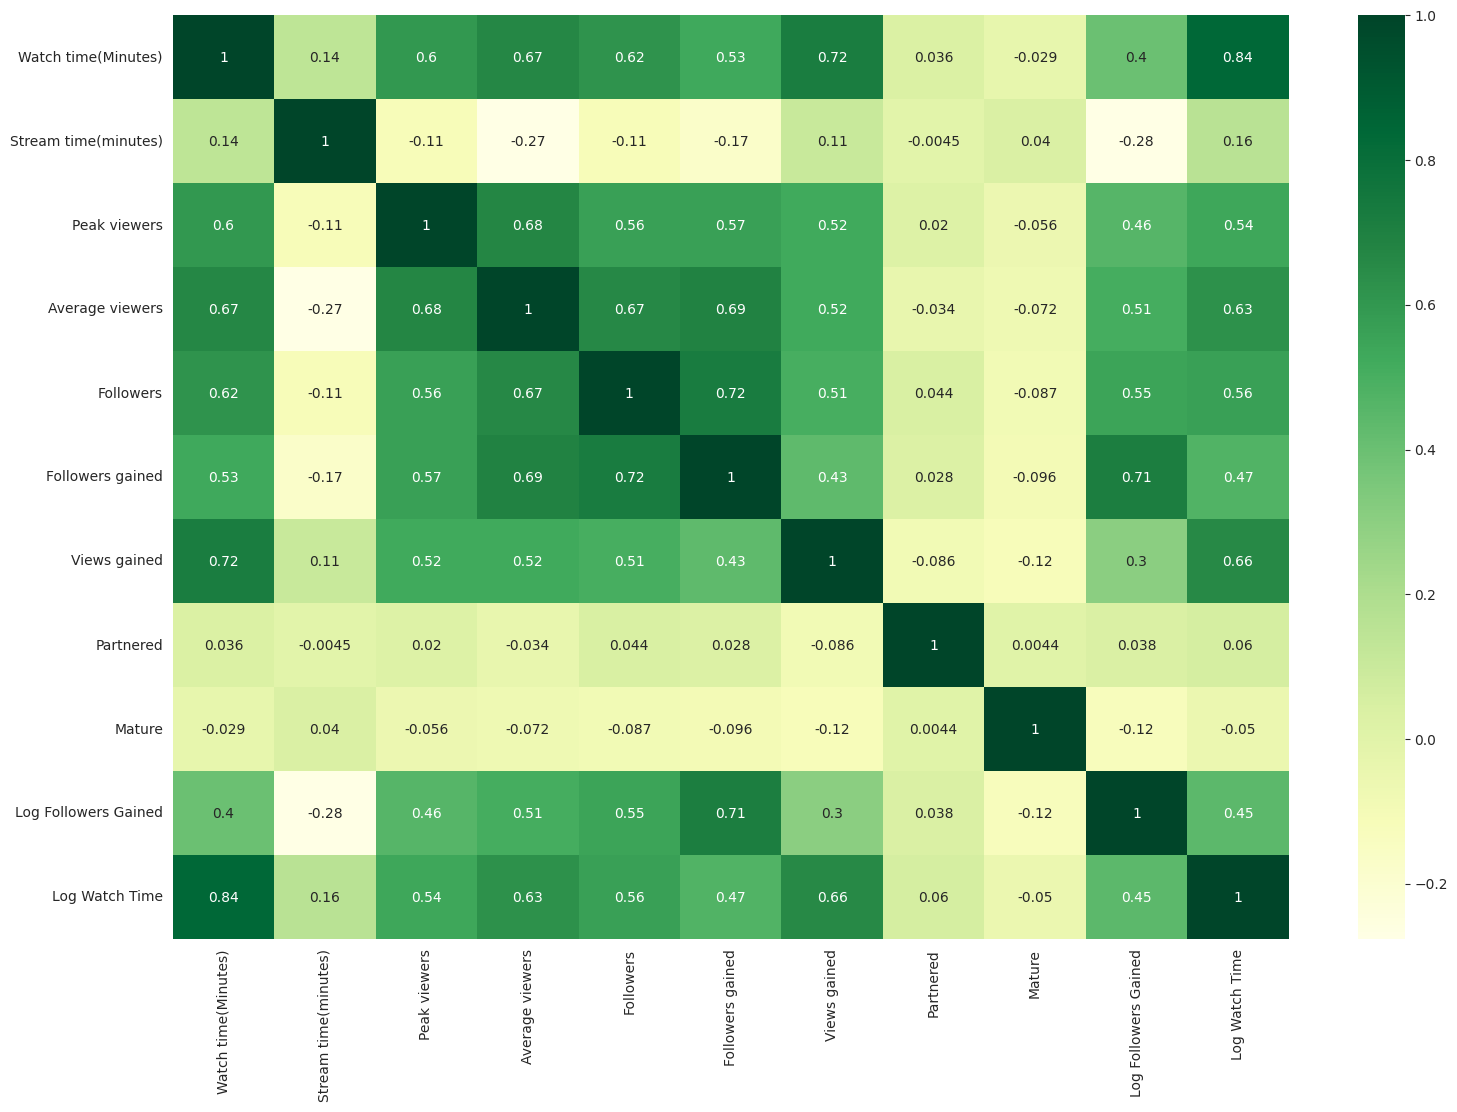

In [279]:
df = data.drop(['Channel','Language'],axis=1)
plt.figure(figsize=(18,12))
sns.heatmap(df.corr(), yticklabels='auto', annot=True, cmap='YlGn')
plt.show()

In [280]:
import numpy as np
from scipy import stats
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split

# Assuming `data` is your original DataFrame
modified_data = data.copy()

# Log-transform followers to address skewness
modified_data['Log_Followers'] = np.log1p(modified_data['Followers'])

# Binary encode Mature column
modified_data['Mature'] = modified_data['Mature'].astype(int)

# Group Language into English and Others
modified_data['Language'] = modified_data['Language'].apply(
    lambda x: 'English' if x == 'English' else 'Others'
)

# Create a new binary column for Stream Time
average_stream_time = modified_data['Stream time(minutes)'].mean()
modified_data['Frequency_of_Streaming'] = modified_data['Stream time(minutes)'].apply(
    lambda x: 'frequent' if x >= average_stream_time else 'less_frequent'
)

# Train-test split
train_data, test_data = train_test_split(modified_data, test_size=0.2, random_state=42)

# Fit the model with robust standard errors
model = smf.ols(
    formula='Log_Followers ~ C(Language) + C(Frequency_of_Streaming) + C(Mature)',
    data=train_data
).fit(cov_type='HC3')

# Model summary
print(model.summary())

# Predict and evaluate on the test set
test_data['Predicted_Log_Followers'] = model.predict(test_data)

# Evaluate performance (R-squared on test data)
from sklearn.metrics import r2_score

test_r2 = r2_score(test_data['Log_Followers'], test_data['Predicted_Log_Followers'])
print(f"Test R-squared: {test_r2}")



                            OLS Regression Results                            
Dep. Variable:          Log_Followers   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     21.23
Date:                Tue, 10 Dec 2024   Prob (F-statistic):           3.27e-13
Time:                        20:42:39   Log-Likelihood:                -1052.5
No. Observations:                 764   AIC:                             2113.
Df Residuals:                     760   BIC:                             2132.
Df Model:                           3                                         
Covariance Type:                  HC3                                         
                                                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

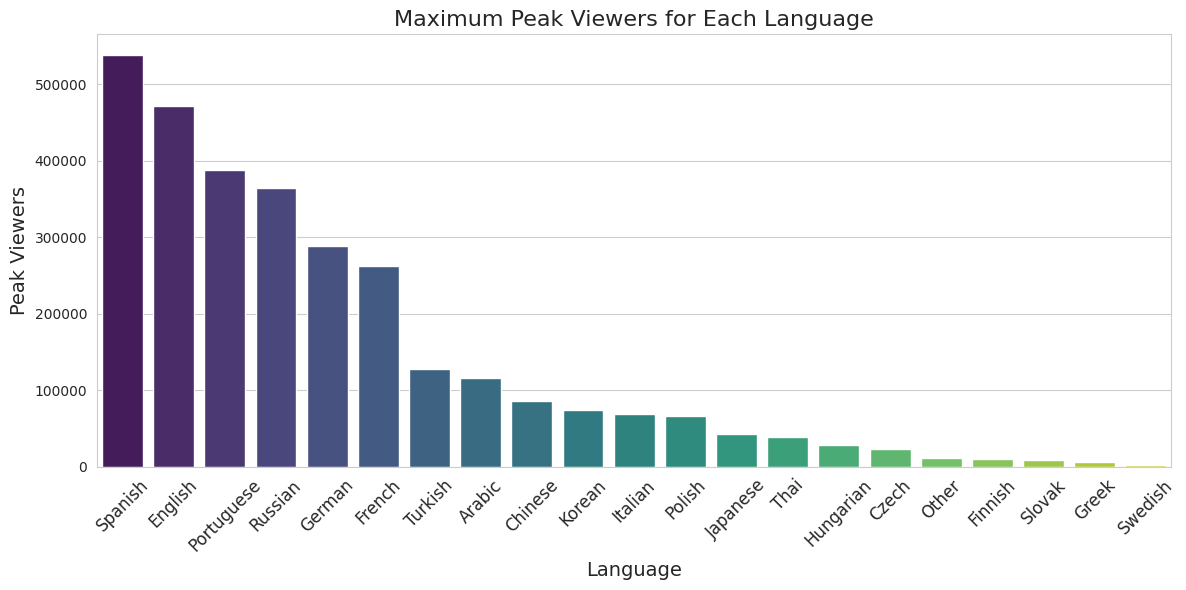

In [281]:
df = data.copy()
peak_viewers_per_language = df.groupby('Language')['Peak viewers'].max().reset_index()

# Sort by Peak viewers in descending order
peak_viewers_per_language = peak_viewers_per_language.sort_values(by='Peak viewers', ascending=False)

# Visualization
plt.figure(figsize=(12, 6))
sns.barplot(
    data=peak_viewers_per_language,
    x='Language',
    y='Peak viewers',
    palette='viridis'
)

# Add labels and title
plt.title('Maximum Peak Viewers for Each Language', fontsize=16)
plt.xlabel('Language', fontsize=14)
plt.ylabel('Peak Viewers', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()

# Display the plot
plt.savefig('max(peak viewers) vs lang.png')
plt.show()

In [282]:
df = data.copy()
df.loc[:,df.select_dtypes(['int','float']).columns] = df.loc[:,df.select_dtypes(['int','float']).columns].astype(float)

In [283]:
for col in df.select_dtypes('int').columns:
    df[col] = df[col].astype(float)

In [284]:
df = df.dropna()

In [285]:
df.describe()

,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Log Followers Gained,Log Watch Time
count,9.530000e+02,953.000000,953.000000,953.000000,9.530000e+02,9.530000e+02,9.530000e+02,953.000000,953.000000
mean,4.038688e+08,121946.348374,32390.828961,4129.122770,5.610003e+05,2.076049e+05,1.043677e+07,11.507978,19.468300
std,5.281804e+08,83638.264841,49974.891094,5289.069954,8.009029e+05,3.458736e+05,1.275843e+07,1.226586,0.722686
min,1.221928e+08,3465.000000,496.000000,235.000000,3.660000e+03,1.110000e+02,1.757880e+05,4.718499,18.621111
25%,1.631328e+08,77475.000000,8770.000000,1422.000000,1.684630e+05,4.407500e+04,3.786059e+06,10.693671,18.910075
50%,2.328160e+08,109725.000000,16128.000000,2326.000000,3.125660e+05,9.884800e+04,6.213041e+06,11.501349,19.265759
75%,4.191876e+08,142350.000000,33075.000000,4445.000000,6.097230e+05,2.342160e+05,1.148336e+07,12.364003,19.853829
max,6.196162e+09,521445.000000,538444.000000,53986.000000,8.938903e+06,3.966525e+06,1.153130e+08,15.193401,22.547196


In [286]:

from scipy import stats # more stats
from sklearn.tree import DecisionTreeRegressor, plot_tree # lol machine learning
from sklearn.preprocessing import OneHotEncoder # OHE
from sklearn.pipeline import make_pipeline # lazy pipelines
from sklearn import metrics # metrics for stuff
## create our pipeline
dt = DecisionTreeRegressor(max_depth=3)

## set channel as index
X = df.set_index('Channel').drop('Average viewers',axis=1)
y = df.loc[:,'Average viewers']

## one hot encode our data
X = pd.get_dummies(X)
## fit our model
dt.fit(X,y)

DecisionTreeRegressor(max_depth=3)

In [287]:
# get our feature importances
feat_imps = pd.Series(dt.feature_importances_, index=dt.feature_names_in_).sort_values()

feat_imps = feat_imps.reset_index().rename(columns={'index':'feature',0:'importance'})
feat_imps

,feature,importance
0,Language_French,0.000000
1,Language_Swedish,0.000000
2,Language_Spanish,0.000000
3,Language_Slovak,0.000000
4,Language_Russian,0.000000
5,Language_Portuguese,0.000000
6,Language_Polish,0.000000
7,Language_Other,0.000000
8,Language_Korean,0.000000
9,Language_Japanese,0.000000


# Feature Importance for average viewers

In [288]:
import altair as alt
alt.Chart(feat_imps).mark_bar(opacity=0.5, strokeWidth=1, stroke='black').encode(
    y=alt.Y('feature:N', title='Feature', sort='-x'),
    x=alt.X('importance:Q', title='Feature Importance'),
    tooltip=['feature','importance']
).interactive().properties(title='Feature Importances from Decision Tree Regression Model')
#chart.save(os.path.join('/kaggle/working/', 'Feature_Importance_average_viewers.png'))

alt.Chart(...)

In [289]:
df1 = data.copy()

# Feature Importance for Followers gained

In [290]:
df1.loc[:,df1.select_dtypes(['int','float']).columns] = df1.loc[:,df1.select_dtypes(['int','float']).columns].astype(float)

In [291]:
for col in df1.select_dtypes('int').columns:
    df1[col] = df1[col].astype(float)

In [292]:
df1 = df1.dropna()

In [293]:
dt1 = DecisionTreeRegressor(max_depth=3)

## set channel as index
X1 = df1.set_index('Channel').drop(['Followers gained','Log Followers Gained'],axis=1)
y1 = df1.loc[:,'Followers gained']

## one hot encode our data
X1 = pd.get_dummies(X1)
## fit our model
dt1.fit(X1,y1)

DecisionTreeRegressor(max_depth=3)

In [294]:
feat_imps1 = pd.Series(dt1.feature_importances_, index=dt1.feature_names_in_).sort_values()

feat_imps1 = feat_imps1.reset_index().rename(columns={'index':'feature',0:'importance'})
feat_imps1

,feature,importance
0,Watch time(Minutes),0.000000
1,Language_Swedish,0.000000
2,Language_Slovak,0.000000
3,Language_Russian,0.000000
4,Language_Portuguese,0.000000
5,Language_Polish,0.000000
6,Language_Other,0.000000
7,Language_Korean,0.000000
8,Language_Japanese,0.000000
9,Language_Italian,0.000000


In [295]:
alt.Chart(feat_imps1).mark_bar(opacity=0.5, strokeWidth=1, stroke='black').encode(
    y=alt.Y('feature:N', title='Feature', sort='-x'),
    x=alt.X('importance:Q', title='Feature Importance'),
    tooltip=['feature','importance']
).interactive().properties(title='Feature Importances from Decision Tree Regression Model')
#alt.savefig('Feature_Importance_Followers_gained.png')

alt.Chart(...)